<a href="https://colab.research.google.com/github/kleeresearch/ResearchProj_UHI/blob/main/1_detection_white_roof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter as uf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.ndimage import binary_dilation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


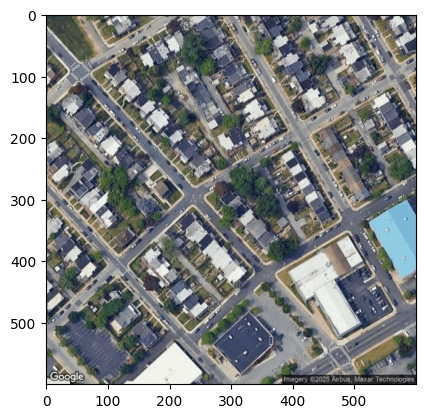

In [ ]:
# -- read the image
#file_path = "/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_0.png"
file_path = "/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_1.png"

#img = iio.imread("../output/uhi/detection1.png") / 255.
img = iio.imread(file_path) / 255.

img = img[:,:,:3]
nrow, ncol, nclr = img.shape

plt.close("all")
plt.imshow(img)
plt.show()

In [ ]:
# -- get ean filtered image of 3 by 3 box bounded
avg = uf(img, (3,3,1))

In [ ]:
# -- get the standard deviation image of 3 by 3 box bounded
sig = np.sqrt((uf(img**2, (3,3,1)) - uf(img, (3,3,1))**2).clip(min=0))

In [ ]:
# -- initialize feature list
flist = []

# -- stack the means for S2
for ii in [-2,0,3]:
    for jj in [-2,0,2]:
        flist.append(np.roll(avg, (ii,jj), axis=(0,1))) # mean

# -- stack the std devs for S2
for ii in [-2,0,2]:
    for jj in [-2,0,2]:
        flist.append(np.roll(sig, (ii,jj), axis=(0,1))) # standard deviation

# -- stack the means for S4
for ii in [-4,0,4]:
    for jj in [-4,0,4]:
        if ii == jj == 0:
            continue
        flist.append(np.roll(avg, (ii, jj), axis=(0,1)))

# -- stack the std devs for S4
for ii in [-4,0,4]:
    for jj in [-4,0,4]:
        if ii == jj == 0: # not including the center pixels
            continue
        flist.append(np.roll(sig, (ii, jj), axis=(0,1)))

# -- convert to feature array
feat_full = np.array(flist).transpose(1,2,3,0).reshape(nrow, ncol, nclr *34)

In [ ]:
# # picking up pixels using ginput
# Python - open up terminal and


# py
# img = imread("../data/image_test.png")[...,:3]
# imshow(img)

# pos = np.array(ginput(10,)) # pick 10 pixels

# xarray (columns) and yarray (rows) -> ::-1 is making reverse

In [ ]:
## Step 1:

## Step 2: open Terminal in MacOS

# ls
# cd
# cd Desktop
# cd uhi_data (folder name)

# python
# import matplotlib.pyplot as plt
# import numpy as np

## Pick white roof location points and save file

# img = plt.imread("map.png")[..., :3]
# plt.imshow(img)

# Get N=10 clicked points
# pos = np.array(plt.ginput(10, timeout=0)) # 10 is number of pixels I want to pick
# print(pos)

# np.save("white_roof_loc_pos.npy", pos)


## Pick non-white roof location points and save file
# img = plt.imread("map.png")
# plt.imshow(img)

# neg = np.array(plt.ginput(10, timeout=0))
# print(neg)

# np.save("white_roof_loc_neg.npy", neg)

In [ ]:
# Gdobler
# # -- load the postive and negative example locations
# pos = np.load("../output/white_roof_loc_pos.npy")[:, ::-1].astype(int)
# neg = np.load("../output/white_roof_loc_neg.npy")[:,::-1].astype(int)

In [ ]:
# # -- load the postive and negative example locations
# pos = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down//white_roof_loc_pos.npy")[:, ::-1].astype(int)
# neg = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down//white_roof_loc_neg.npy")[:,::-1].astype(int)

# pos.shape, neg.shape

In [ ]:
# # -- load the postive and negative example locations
# pos = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_0_pos.npy")[:, ::-1].astype(int)
# neg = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_0_neg.npy")[:,::-1].astype(int)

# pos.shape, neg.shape

In [ ]:
N = 500

# -- load the postive and negative example locations
pos = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_0_pos_500.npy")[:, ::-1].astype(int)[:N]

#neg = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_0_neg_500.npy")[:,::-1].astype(int)[:N]
#neg = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_0_neg_500_v2.npy")[:,::-1].astype(int)[:N]
#neg = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_0_neg_1000.npy")[:,::-1].astype(int)[:]
neg = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_0_neg_1500.npy")[:,::-1].astype(int)[:]
#neg = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_0_neg_500_v3.npy")[:,::-1].astype(int)[:N]

pos.shape, neg.shape

((500, 2), (1500, 2))

In [ ]:
N=500

# -- load the postive and negative example locations
pos = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_1_pos_500.npy")[:, ::-1].astype(int)[:N]
#neg = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_1_neg_500_v3.npy")[:,::-1].astype(int)[:N]
neg = np.load("/content/drive/MyDrive/0_AC_data/Googlemap_down/map20250319/map0_1_neg_1500.npy")[:,::-1].astype(int)[:]

pos.shape, neg.shape

((500, 2), (1500, 2))

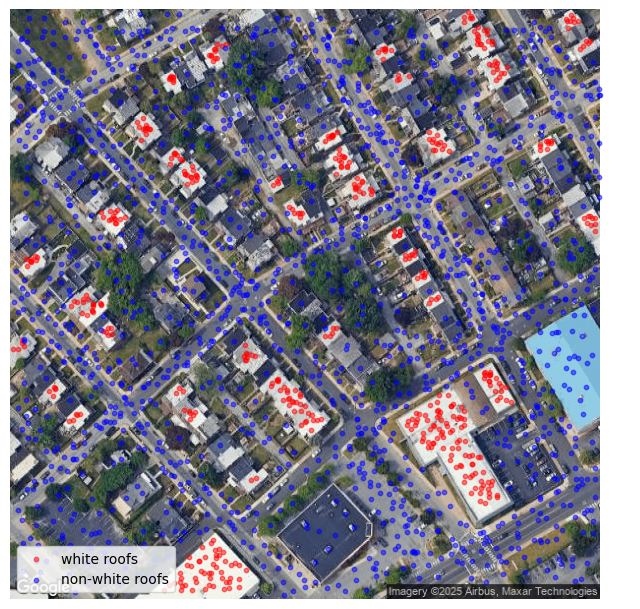

In [ ]:
# - Plotting target locations
pos_x, pos_y = pos.T[0], pos.T[1]
neg_x, neg_y = neg.T[0], neg.T[1]

# Plot
fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(img)
for i in range(len(pos_x)):
    ax.scatter(pos_y[i], pos_x[i], color="red", s=10, alpha=0.5)
for j in range(len(neg_x)):
    ax.scatter(neg_y[j], neg_x[j], color="blue", s=10, alpha=0.5)

plt.scatter(pos_y[0], pos_x[0], color="red", s=10, alpha=0.5, label="white roofs")
plt.scatter(neg_y[0], neg_x[0], color="blue", s=10, alpha=0.5, label="non-white roofs")
plt.legend()

plt.axis("off")
plt.show()

In [ ]:
feat_full.shape

(600, 600, 102)

In [ ]:
neg

array([[416, 352],
       [431, 337],
       [458, 313],
       ...,
       [358,  54],
       [320,  55],
       [307,  47]])

In [ ]:
# -- subset the feature array
feat_pos = feat_full[pos[:,0], pos[:,1]]
feat_neg = feat_full[neg[:,0], neg[:,1]]

# -- create features for training/testing
feat = np.vstack((feat_pos, feat_neg))

# -- create target array for training/testing
targ = np.concatenate((np.ones(len(feat_pos), dtype=float), np.zeros(len(feat_neg), dtype=float)))

# -- create train/test split
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, random_state=314)

# -- train the model
rfr = RandomForestRegressor()
rfr.fit(feat_tr, targ_tr)

# -- evaluate the model
pred_te = rfr.predict(feat_te)
print(classification_report(targ_te > 0.5, pred_te > 0.5))

IndexError: index 600 is out of bounds for axis 1 with size 600

In [ ]:
# -- apply to full image
pred_full = rfr.predict(feat_full.reshape(nrow * ncol, feat_full.shape[2]))

In [ ]:
# -- reshape to image
pred_img = pred_full.reshape(nrow, ncol)

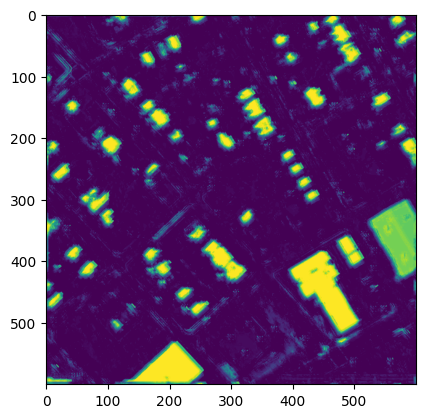

In [ ]:
# -- display prediction image
plt.close("all")
plt.imshow(pred_img)

In [ ]:
# -- create boundaries of high detections
thr = 0.9
pred_bin = pred_img > thr
bound = 1.0 * binary_dilation(pred_bin, iterations=6) - pred_bin

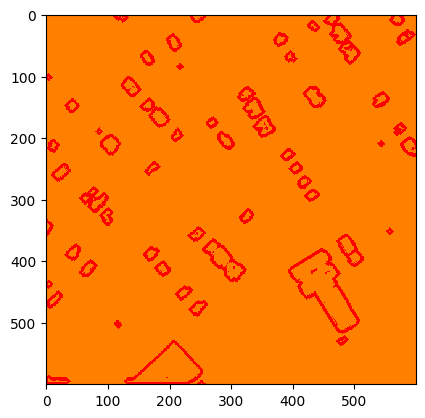

In [ ]:
# -- display

fig, ax =plt.subplots()
# ax.imshow(img)
ax.imshow(bound, cmap="autumn_r", alpha=bound, vmin=-1, vmax=1, interpolation="nearest")

# ax.axis("off")
ax.set_facecolor("blue")
fig.show()

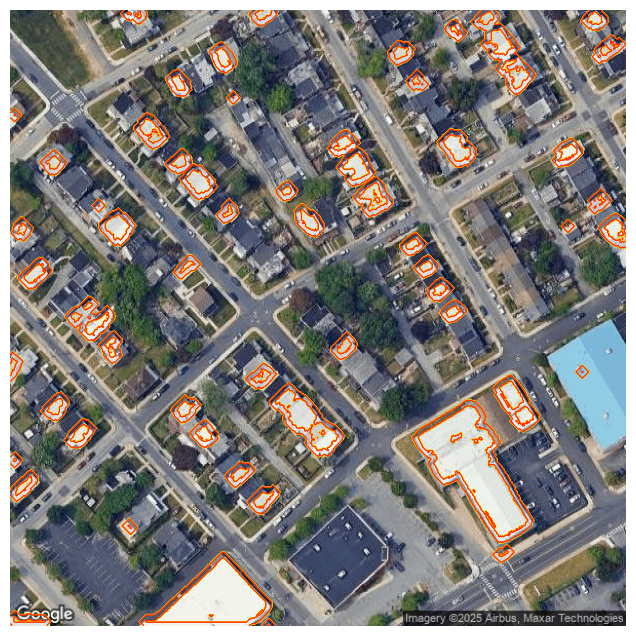

In [ ]:
# -- display
plt.close("all")

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img)
#plt.imshow(bound, cmap="autumn_r", alpha=bound.clip(0.0,1.0))
ax.contour(bound, cmap="autumn_r", linewidths=0.5)

plt.axis("off")
plt.show()